In [210]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.special import stdtrit

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")
if sys.platform == 'win32':
    df = pd.read_csv("D:/OneDrive/Research/2021_Market_Ecology/evology/evology/code/rundata/run_data.csv")

In [211]:
if df['AvgSignificance'].sum() != 0:
    print("Avg number of standard deviations between funds")
    print(df['AvgSignificance'].mean())
    print(df["AvgNumberDev"].mean())
    print(df["PerSignif"].mean())


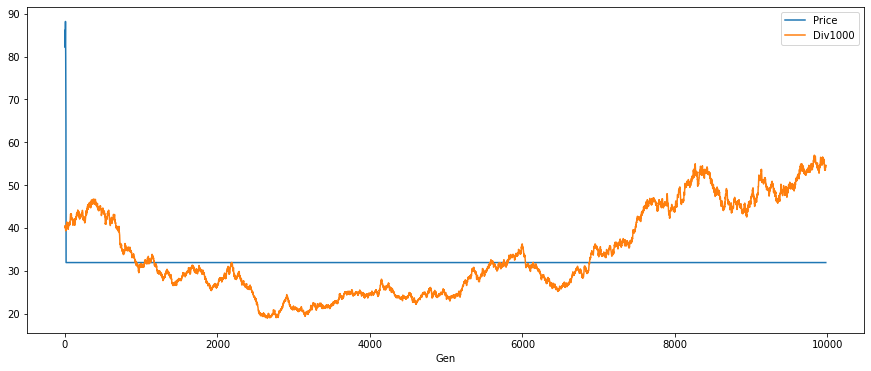

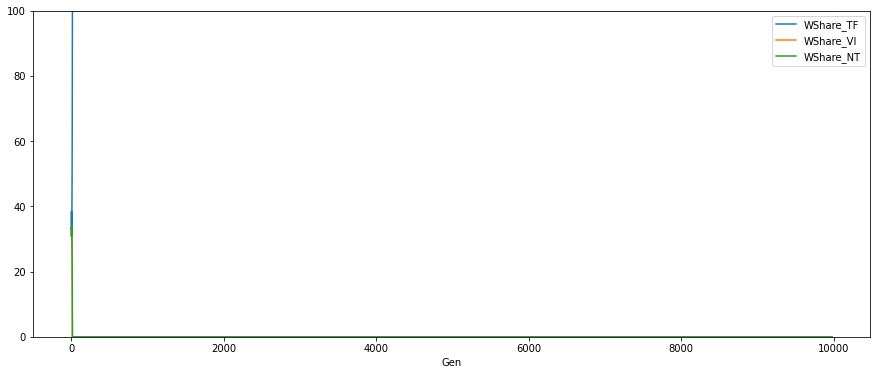

In [212]:
# TODO: add fundamental value?

df['Div1000'] = 10000 * df['Dividends']
df.plot(x="Gen", y = ['Price', 'Div1000'],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6), ylim=(0,100))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()

Annual Sharpe ratios 
nan nan 0.9138272010655837
Annual mean returns  
[nan, nan, 0.10120260399644314]
Annual std returns
[nan, nan, 0.1107458870543951]


/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_62644/343714513.py:3: RuntimeWarning: Mean of empty slice
  SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_62644/343714513.py:4: RuntimeWarning: Mean of empty slice
  SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
/var/folders/vt/cnvcr__n5pn60jkl8nh7fzrw0000gn/T/ipykernel_62644/343714513.py:10: RuntimeWarning: Mean of empty slice
  print([np.nanmean(df['NT_AnnualReturns']), np.nanmean(df['VI_AnnualReturns']), np.nanmean(df['TF_AnnualReturns'])])


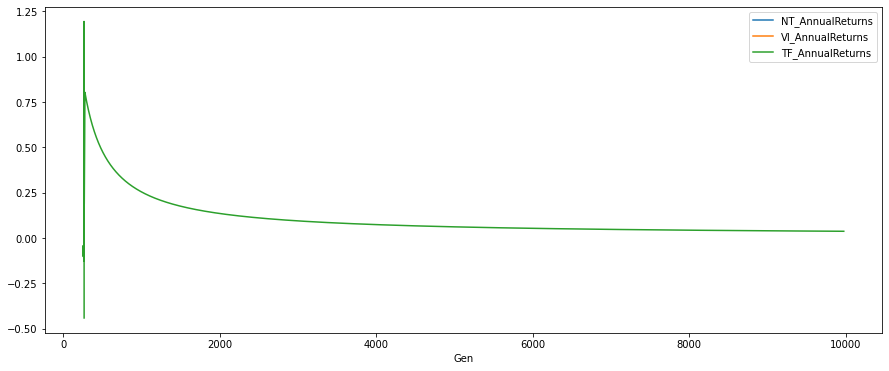

In [213]:
""" Sharpe ratios based on annual returns """

SharpeNT = np.nanmean(df['NT_AnnualReturns']) / np.nanstd(df['NT_AnnualReturns'])
SharpeVI = np.nanmean(df['VI_AnnualReturns']) / np.nanstd(df['VI_AnnualReturns'])
SharpeTF = np.nanmean(df['TF_AnnualReturns']) / np.nanstd(df['TF_AnnualReturns'])

print('Annual Sharpe ratios ')
print(SharpeNT, SharpeVI, SharpeTF)
print('Annual mean returns  ')
print([np.nanmean(df['NT_AnnualReturns']), np.nanmean(df['VI_AnnualReturns']), np.nanmean(df['TF_AnnualReturns'])])
print('Annual std returns')
print([np.nanstd(df['NT_AnnualReturns']), np.nanstd(df['VI_AnnualReturns']), np.nanstd(df['TF_AnnualReturns'])])

df.plot(x="Gen", y = ["NT_AnnualReturns", "VI_AnnualReturns", "TF_AnnualReturns"],
        kind="line", figsize=(15, 6))
plt.show()



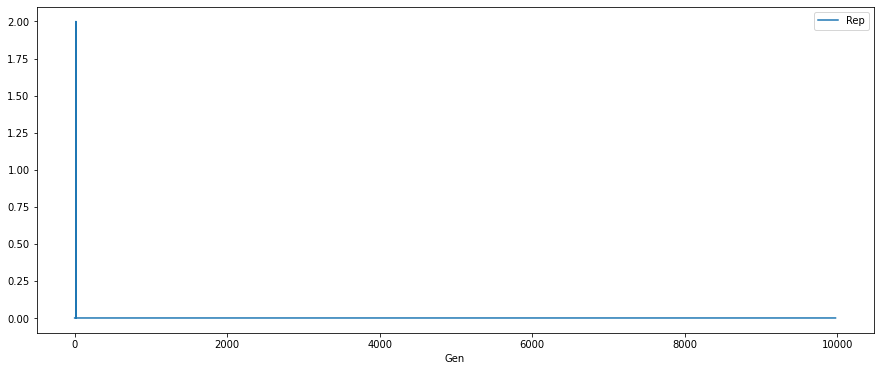

In [214]:

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()

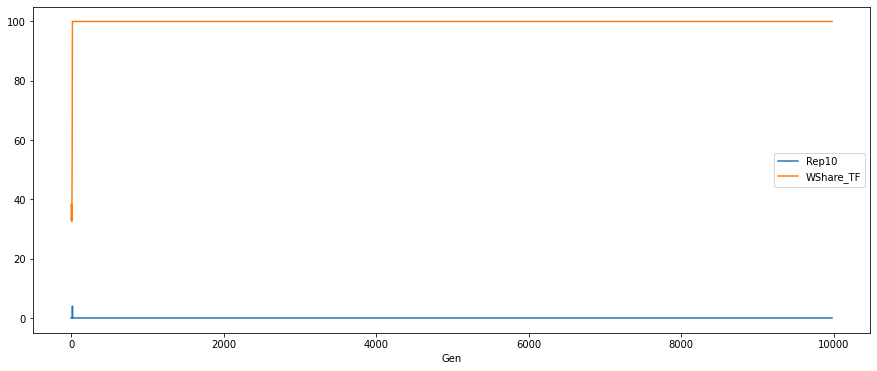

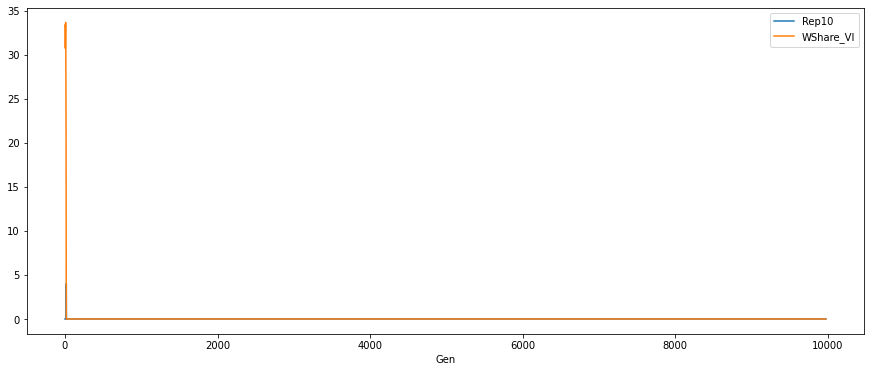

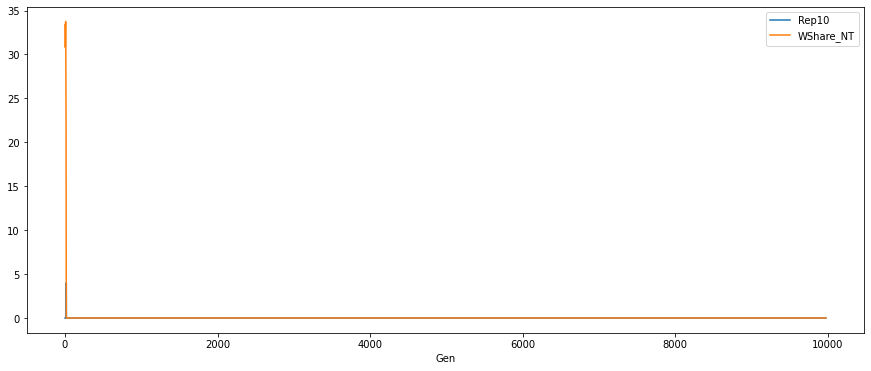

In [215]:
if df['Rep'].sum() != 0:
        df['Rep10'] = 2 * df['Rep']
        df.plot(x="Gen", y = ['Rep10','WShare_TF'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_VI'],
        kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['Rep10','WShare_NT'],
        kind="line", figsize=(15, 6))
        plt.show()

In [216]:
if df['CountSelected'].sum() != 0 or df['CountMutated'].sum() != 0 or df['CountCrossed'].sum() != 0:

        df.plot(x="Gen", y = ["CountSelected", 'CountMutated', 'CountCrossed'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy outflows')
        df.plot(x="Gen", y = ["FromNT", 'FromVI', 'FromTF'],
                kind="line", figsize=(15, 6))
        plt.show()
        print('Strategy inflows')
        df.plot(x="Gen", y = ["TowardsNT", 'TowardsVI', 'TowardsTF'],
                kind="line", figsize=(15, 6))
        plt.show()

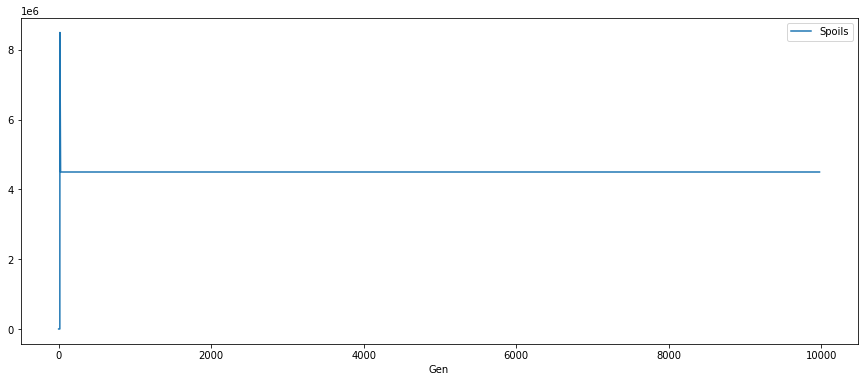

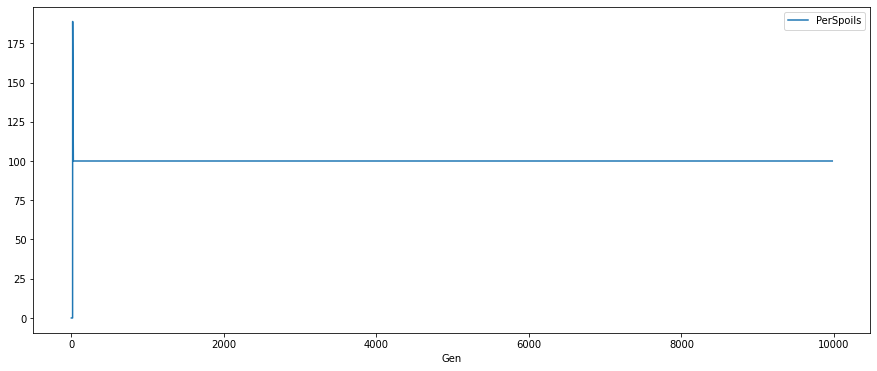

In [217]:
if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

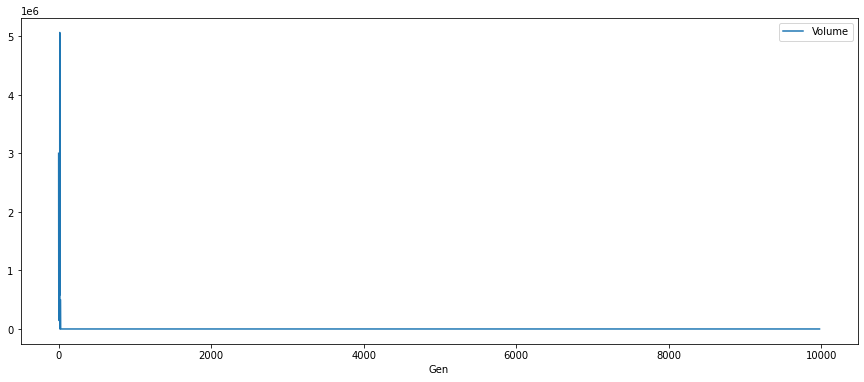

0       3.003217e+06
1       3.779300e+05
2       2.989356e+05
3       8.088552e+05
4       1.625074e+05
            ...     
9974    0.000000e+00
9975    0.000000e+00
9976    0.000000e+00
9977    0.000000e+00
9978    0.000000e+00
Name: Volume, Length: 9979, dtype: float64


In [218]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

print(df['Volume'])

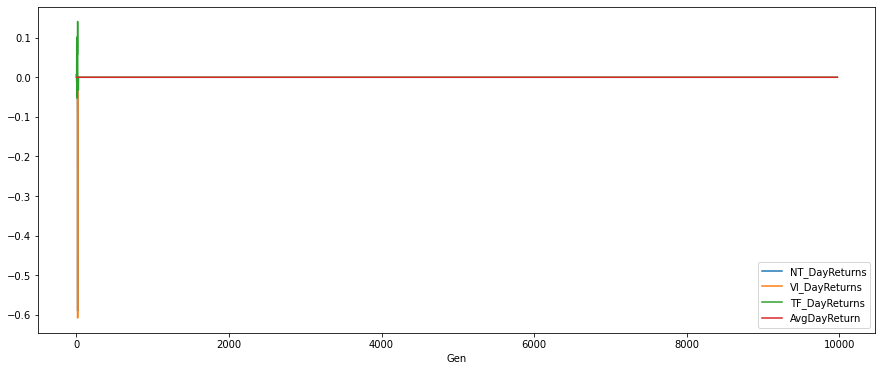

In [219]:
df.plot(x="Gen", y = ["NT_DayReturns", "VI_DayReturns", "TF_DayReturns", 'AvgDayReturn'],
        kind="line", figsize=(15, 6))
plt.show()

In [220]:
if df['AvgSignificance'].sum() != 0:

        print(df['AvgSignificance'].mean())

        df.plot(x="Gen", y = ["AvgSignificance"],
                kind="line", figsize=(15, 6))
        plt.show()

Z = stdtrit(3, 0.95)
if df['NumberDeviations'].sum() != 0:
        df['NumberDeviations'] = df['AvgSignificance'] - Z

        df.plot(x="Gen", y = ["NumberDeviations"],
                kind="line", figsize=(15, 6))
        plt.show()

KeyError: 'NumberDeviations'

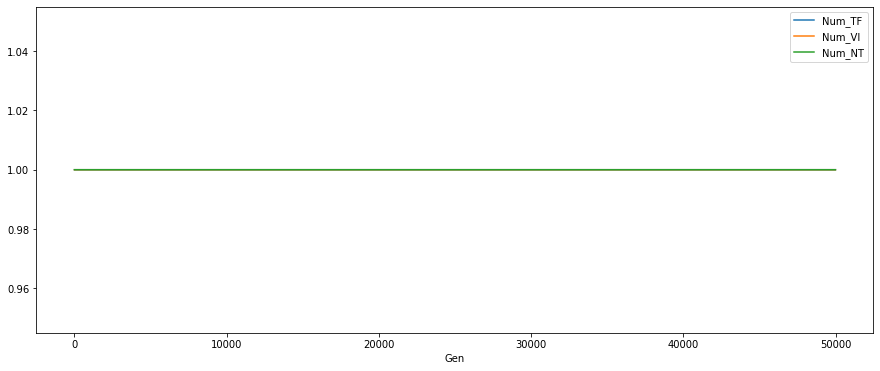

In [ ]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


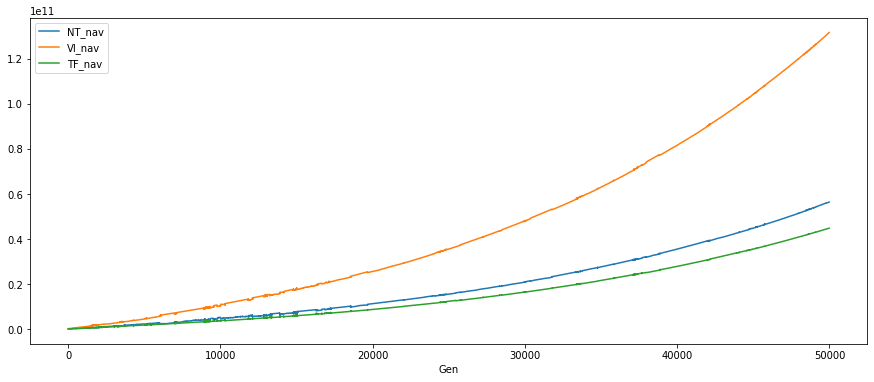

In [ ]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


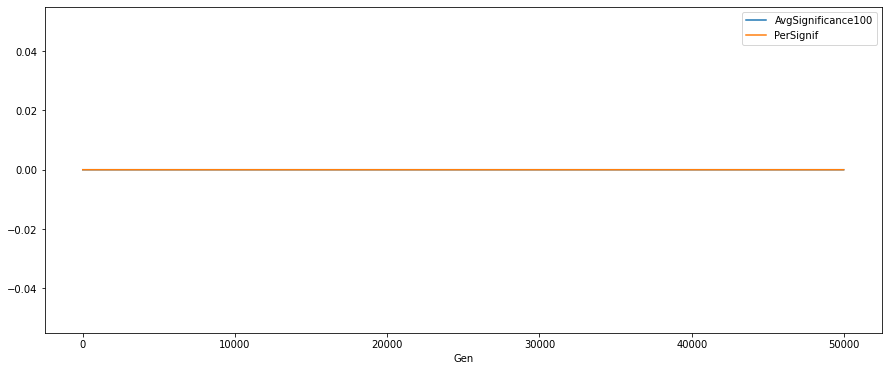

In [ ]:
df['AvgSignificance100'] = 10 * df["AvgSignificance"]

df.plot(x="Gen", y = ["AvgSignificance100", "PerSignif"],
        kind="line", figsize=(15, 6))
plt.show()

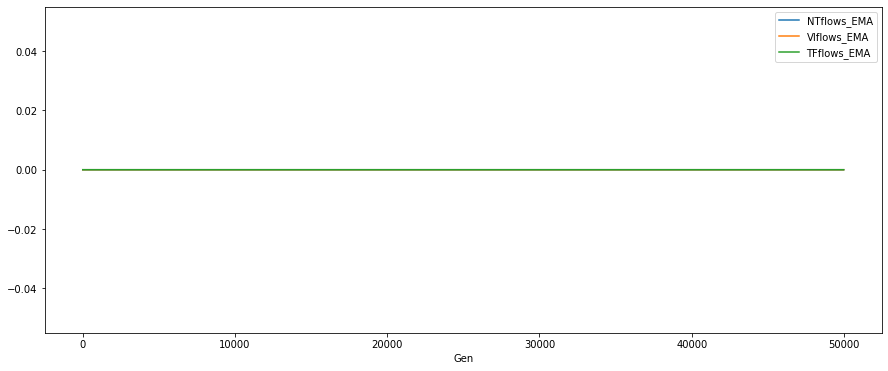

KeyError: 'NumberDeviations'

In [ ]:
# df.plot(x="Gen", y = ["NTflows", "VIflows", "TFflows"],
#         kind="line", figsize=(15, 6))
# plt.show()

span = 252*5

df['NTflows_EMA'] = pd.Series.ewm(df['NTflows'], span=span).mean()
df['VIflows_EMA'] = pd.Series.ewm(df['VIflows'], span=span).mean()
df['TFflows_EMA'] = pd.Series.ewm(df['TFflows'], span=span).mean()

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()



df['AvgSignifEMA'] = pd.Series.ewm(df['NumberDeviations'], span=span/5).mean() / 100

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA", "AvgSignifEMA"],
        kind="line", figsize=(15, 6))
plt.show()


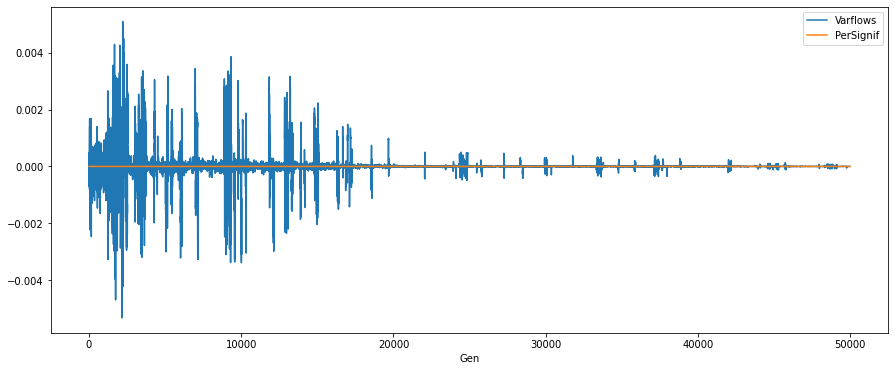

In [ ]:
df['Varflows'] = df['NTflows'].pct_change() + df['VIflows'].pct_change() + df['TFflows'].pct_change()
df.plot(x="Gen", y = ["Varflows", "PerSignif"],
        kind="line", figsize=(15, 6))
plt.show()

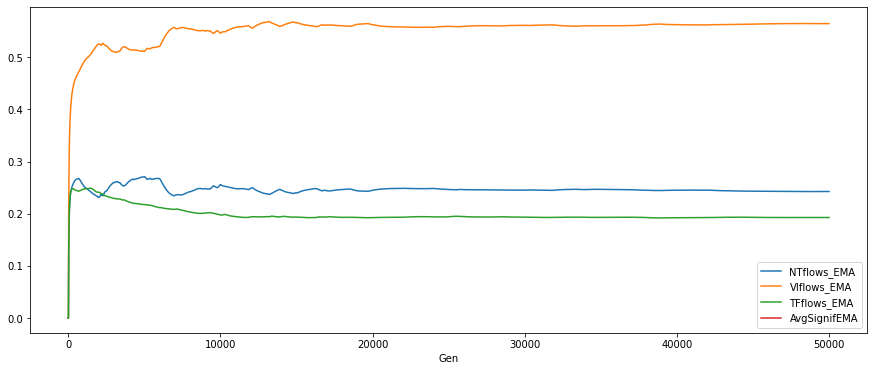

In [ ]:
df['AvgSignifEMA'] = pd.Series.ewm(df['AvgSignificance'].pct_change(periods=252), span=span).mean() 
df['AvgSignifEMA'] = df['AvgSignificance'].pct_change(periods=252) / 100


df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA", "AvgSignifEMA"],
        kind="line", figsize=(15, 6))
plt.show()

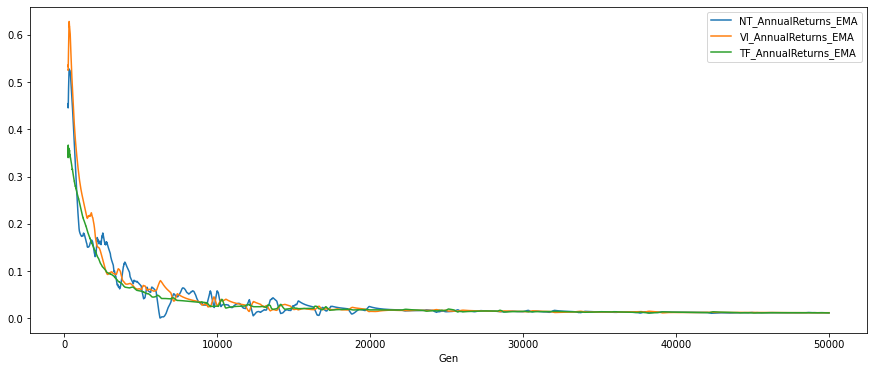

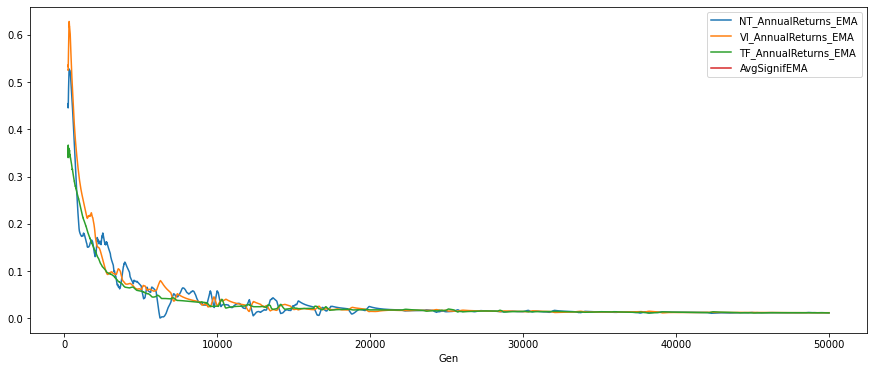

In [ ]:

df['NT_AnnualReturns_EMA'] = pd.Series.ewm(df['NT_AnnualReturns'], span=span).mean()
df['VI_AnnualReturns_EMA'] = pd.Series.ewm(df['VI_AnnualReturns'], span=span).mean()
df['TF_AnnualReturns_EMA'] = pd.Series.ewm(df['TF_AnnualReturns'], span=span).mean()

df.plot(x="Gen", y = ["NT_AnnualReturns_EMA", "VI_AnnualReturns_EMA", "TF_AnnualReturns_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

df['AvgSignifEMA'] = df['AvgSignificance'].pct_change(periods=252) / 100

df['AvgSignifEMA'] = pd.Series.ewm(df['AvgSignificance'].pct_change(), span=span/5).mean()  

df.plot(x="Gen", y = ["NT_AnnualReturns_EMA", "VI_AnnualReturns_EMA", "TF_AnnualReturns_EMA", "AvgSignifEMA"],
        kind="line", figsize=(15, 6))
plt.show()

In [ ]:
data = pd.DataFrame()
# data['NT_AnnualReturns_EMA'] = df['NT_AnnualReturns_EMA']
# data['VI_AnnualReturns_EMA'] = df['VI_AnnualReturns_EMA']
# data['TF_AnnualReturns_EMA'] = df['TF_AnnualReturns_EMA']
data['NTflows_EMA'] = df['NTflows_EMA']
data['VIflows_EMA'] = df['VIflows_EMA']
data['TFflows_EMA'] = df['TFflows_EMA']
data['AvgSignificance'] = df['AvgSignificance']
data['PerSignif'] = df['PerSignif']
print(data.corr())

# # data = pd.DataFrame()
# data['NTflows'] = df['NTflows']
# data['VIflows'] = df['VIflows']
# data['TFflows'] = df['TFflows']
# data['NT_AnnualReturns'] = df['NT_AnnualReturns']
# data['VI_AnnualReturns'] = df['VI_AnnualReturns']
# data['TF_AnnualReturns'] = df['TF_AnnualReturns']
# data.corr()

# ''' Chances of moving in the same direction '''
Total = len(df['NTflows'])


def getjoint(x, y):
    N = len(x)
    serie = []
    for i in range(N):
        if x.loc[i] > 0 and y.loc[i] > 0:
            serie.append(1)
        if x.loc[i] < 0 and y.loc[i] < 0:
            serie.append(-1)
    return serie



ChanceNTVI = 100 * len(getjoint(data['NTflows_EMA'].pct_change(), data['VIflows_EMA'].pct_change())) / Total
print(ChanceNTVI)

ChanceTFVI = 100 * len(getjoint(data['TFflows_EMA'].pct_change(), data['VIflows_EMA'].pct_change())) / Total
print(ChanceTFVI)

ChanceNTTF = 100 * len(getjoint(data['NTflows_EMA'].pct_change(), data['TFflows_EMA'].pct_change())) / Total
print(ChanceNTTF)

ChanceNTSig = 100 * len(getjoint(data['NTflows_EMA'].pct_change(), data['AvgSignificance'].pct_change())) / Total
print(ChanceNTSig)

ChanceVISig = 100 * len(getjoint(data['VIflows_EMA'].pct_change(), data['AvgSignificance'].pct_change())) / Total
print(ChanceVISig)

ChanceTFSig = 100 * len(getjoint(data['TFflows_EMA'].pct_change(), data['AvgSignificance'].pct_change())) / Total
print(ChanceTFSig)




                 NTflows_EMA  VIflows_EMA  TFflows_EMA  AvgSignificance  \
NTflows_EMA         1.000000     0.157987     0.493812              NaN   
VIflows_EMA         0.157987     1.000000    -0.455077              NaN   
TFflows_EMA         0.493812    -0.455077     1.000000              NaN   
AvgSignificance          NaN          NaN          NaN              NaN   
PerSignif                NaN          NaN          NaN              NaN   

                 PerSignif  
NTflows_EMA            NaN  
VIflows_EMA            NaN  
TFflows_EMA            NaN  
AvgSignificance        NaN  
PerSignif              NaN  
11.77694631745333
39.31851377578583
50.02501050441185
0.0
0.0
0.0


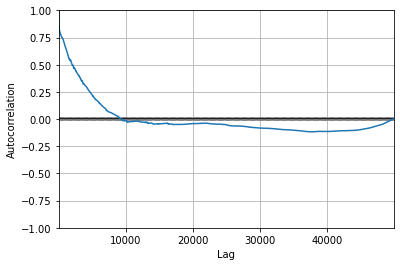

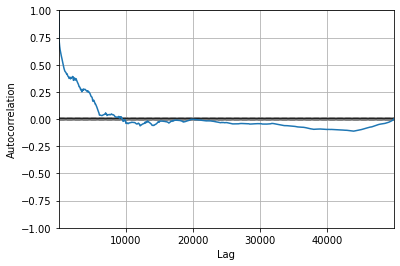

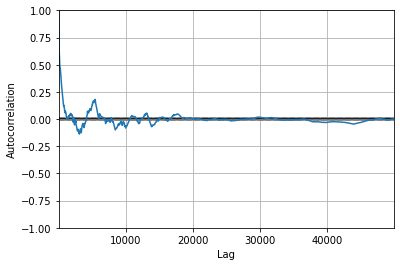

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:458: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / n / c0


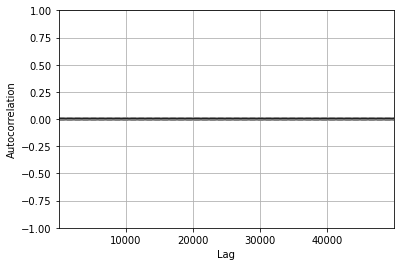

In [ ]:
''' there is periodicity in flows EMA '''

x = pd.plotting.autocorrelation_plot(df['TFflows'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(df['VIflows'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(df['NTflows'])
x.plot()
plt.show()

x = pd.plotting.autocorrelation_plot(df['AvgSignificance'])
x.plot()
plt.show()



In [ ]:
from scipy.signal import periodogram


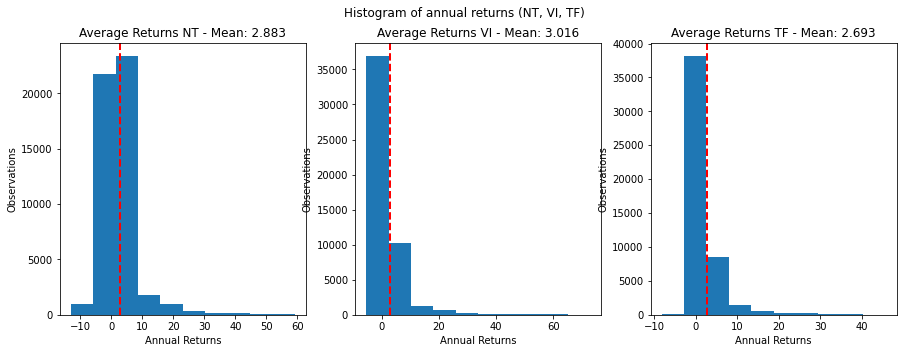

In [ ]:
''' Histogram of the annual strategy returns '''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), sharex = False)
fig.suptitle('Histogram of annual returns (NT, VI, TF)')

ax1.hist(100 * df['NT_AnnualReturns'])
num = 100 * df['NT_AnnualReturns'].mean()
ax1.set_title('Average Returns NT - Mean: %1.3f' % num)
ax1.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax2.hist(100 * df['VI_AnnualReturns'])
num = 100 * df['VI_AnnualReturns'].mean()
ax2.set_title('Average Returns VI - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_AnnualReturns'])
num = 100 * df['TF_AnnualReturns'].mean()
ax3.set_title('Average Returns TF - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax1.set_ylabel('Observations')
ax1.set_xlabel('Annual Returns')
ax2.set_ylabel('Observations')
ax2.set_xlabel('Annual Returns')
ax3.set_ylabel('Observations')
ax3.set_xlabel('Annual Returns')
plt.show()

In [ ]:
''' Price autocorrelation '''

print((df['Price'].pct_change()).autocorr(lag=1))

0.23138950952939172
